# 14 - Introduction to Data Science

Data Science is a field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from structured and unstructured data. It is a multidisciplinary field that combines statistics, data analysis, machine learning, data visualization, and domain expertise to understand complex problems and make data-driven decisions.

**Tools** used in data science include programming languages like Python, R, and SQL, as well as libraries and frameworks like Pandas, NumPy, Scikit-learn, TensorFlow, and PyTorch. Data scientists also use tools for data visualization like Matplotlib, Seaborn, and Tableau.

This lecture is just an introduction and will only treat how python tools that we've already learned can be used in data science.

We'll cover the following topics:
- Reading Files (CSV or Excel) using Pandas
- Data Exploration and Cleaning
    - Data Types
    - Missing Values
    - Duplicates
    - Outliers
    - Encoding Categorical Variables
- Data Visualization
- Regression (Machine Learning)

A great resource for data science training is the [Kaggle](https://www.kaggle.com/) platform. It has a lot of datasets and competitions that you can use to practice your data science skills.

Here we'll use a dataset from Kaggle called "Used Cars Dataset". You can download it [here](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data).

In [1]:
#First import the Pandas Package:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading Files with the Pandas Package
Pandas is a python package that is very helpful in processing data including reading and writing csv files (or other text based files). Similiar to Numpy having many powerful functions and methods, there are many powerful features of the pandas package. You can read more about it here: https://pandas.pydata.org/. 

A CSV file is a file that has comma separated values. It is a text file that can be opened in a text editor. For example, the following data in a text file would be a CSV file:

```
Time (s), Concentration (M), Temperature (K)
0, 0.0, 300
1, 0.1, 310
2, 0.2, 320
3, 0.3, 330
```

You could also have a CSV file that has multiple header rows:

```
This is a description of the data in the file that could be multirowed
Time (s), Concentration (M), Temperature (K)
0, 0.0, 300
1, 0.1, 310
2, 0.2, 320
3, 0.3, 330
```

or you could have a text file that has a tab character is used instead of a comma separating the values.


In [2]:
#Lets read in the data on the used cars
url = 'https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data'
df = pd.read_csv('../../../data/vehicles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
#Referencing a column is done by using the column header name. 
# For example, to get the concentration column, you would use the following:
print(df['odometer']) #print the column named Time (s)
#To get the 30,000th value of that column I'd use the following:
i = 30000
print(df['odometer'][i],'or', df['odometer'].iloc[i], 'or', df.iloc[i]['odometer'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
426875    32226.0
426876    12029.0
426877     4174.0
426878    30112.0
426879    22716.0
Name: odometer, Length: 426880, dtype: float64
130000.0 or 130000.0 or 130000.0


That's weird, the county column doesn't have any non-null values. Let's drop it.

In [5]:
df = df.drop(columns=['county'])

In [6]:
print(df.shape)
print(df.dtypes)

(426880, 25)
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
state            object
lat             float64
long            float64
posting_date     object
dtype: object


For this example, we'd like to predict the price of the vehicle using the data that we have. Some columns are not useful for this prediction like id, url, image_url, and description. We'll drop these columns.

## Models

Anytime you create a function, you've just created a model. A model relates one thing to another. The variable(s) that you can control is/are the independent variable(s) and the output from the function (or model) is/are the dependent variable(s). There are model's all around us including:
- in your phone, there is a model that relates the voltage of the battery to the percentage of battery life left
- in your car, there is a model that relates the vehicle speed to the amount of fuel used 
- in your refrigerator, there is a model that relates the temperature setting to the temperature inside the refrigerator
- in your phone that relates the destination to the route and time predicted to get there

### Empirical or Theoretical Models

Models can be empirical which is what is typically meant when you complete regression: you fit data collected to an empirical relationship. For example, you might have a set of data that you fit to a linear model. The linear model is an empirical model.

Theoretical models are models that are based on theory. For example, the ideal gas law is a theoretical model. Or for ODE's that we've talked about where we use the balance equations (accum = in - out + gen - cons), the relationship between the independent variables and dependent variables can be based on theory.

Here we're looking at an empirical model. We're going to use a linear regression model to predict the price of a vehicle based on the data that we have.

In [7]:
df = df.drop(columns=['id','url', 'region_url', 'image_url', 'description','posting_date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
 17  lat           420331 non-null  float64
 18  long

<Axes: xlabel='type'>

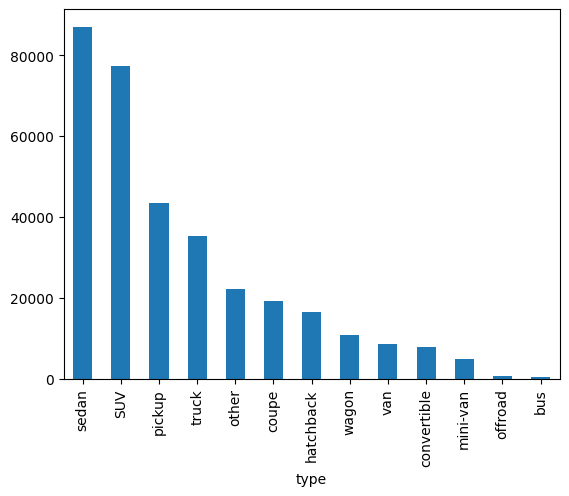

In [9]:
df['type'].value_counts().plot(kind='bar')

Some of the columns are objects (strings) and some are integers. We'll need to convert the objects to integers. That is done by encoding the objects. We'll use the `LabelEncoder` from the `sklearn.preprocessing` package to encode the objects.

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for each in df.columns:
    if df[each].dtypes == 'object':
        df[each] = label_encoder.fit_transform(df[each].astype(str))

Lets check for outliers from the numeric columns.

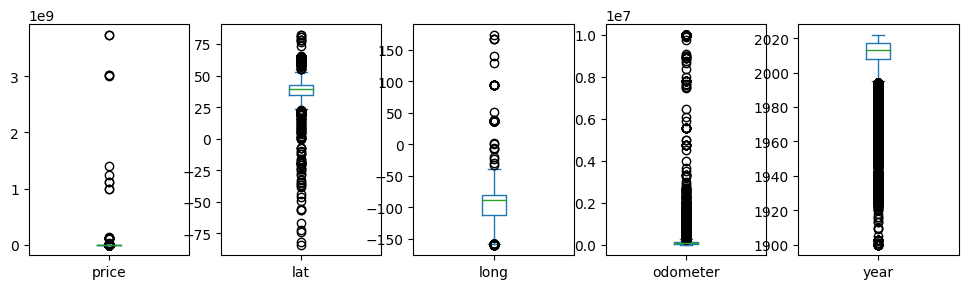

In [11]:
df[['price','lat','long','odometer','year']].plot(kind='box', subplots=True, figsize=(12,3))
plt.show()

Whoa, there are vehicles that have prices near 1e9?!! That's a billion dollars! Those are outliers. We'll remove rows that have a price greater than \$40000. And let's also just consider the last 20 years of vehicles.

In [12]:
df = df[df['price'] < 40000]
df = df[df['year'] > 2000]

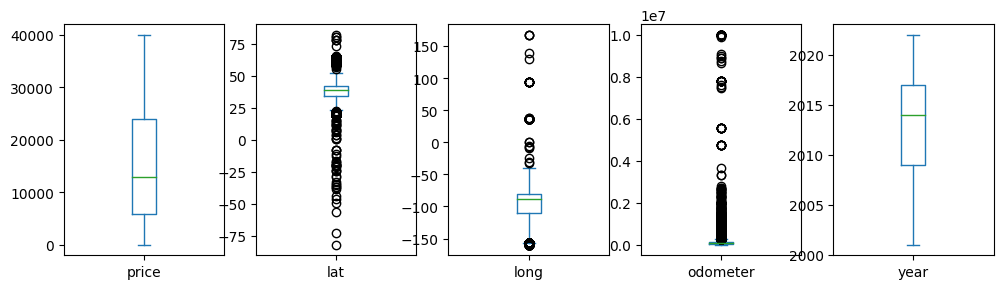

In [13]:
df[['price','lat','long','odometer','year']].plot(kind='box', subplots=True, figsize=(12,3))
plt.show()

There are some rows that have missing values. We'll remove those rows.

In [14]:
df = df.dropna()

<Axes: ylabel='Frequency'>

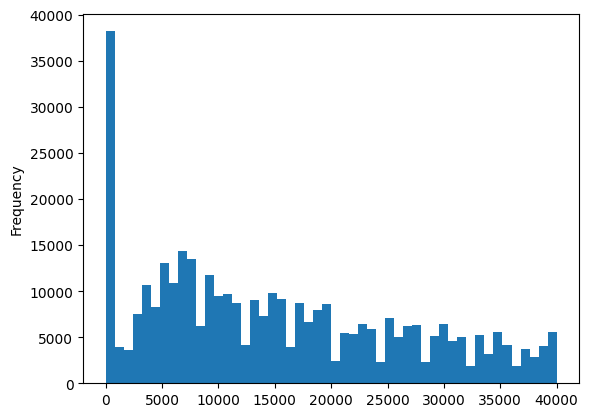

In [15]:
df['price'].plot(kind='hist', bins=50)

What about prices that are less than 100? We'll remove those rows as well.

In [16]:
df = df[df['price'] > 100]

In [17]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64

Those data don't look like there are many outliers. Let's look at the data as correlation matrix to see if there are any correlations between the columns. First we need to import seaborn, a data visualization library.

<Axes: >

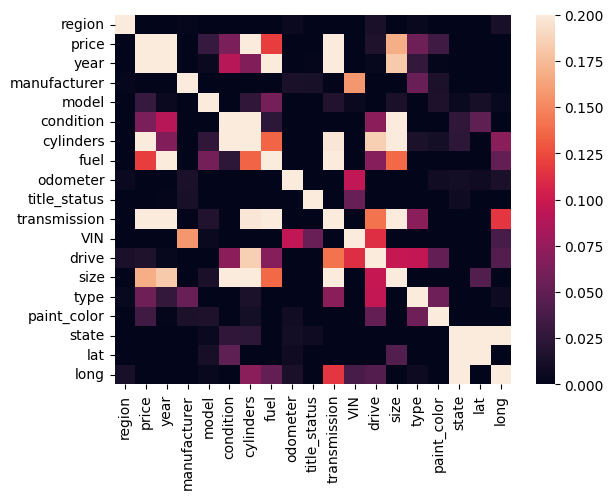

In [18]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, vmin=0, vmax=0.2)

## Regression and Creating a Model for Prediction

In [19]:
# Let's make a parametric model using just a subset of the variables
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# First we choose our variables
X = df.drop(columns=['price'])
y = df['price']


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [23]:
# Evaluate the model
r2test = r2_score(y_test, y_pred)
r2train = r2_score(y_train,y_pred_train)
print(f'R^2 Score on Test Set: {r2test}')
print(f'R^2 Score on the Training Set: {r2train}')

R^2 Score on Test Set: 0.4742875688132292
R^2 Score on the Training Set: 0.47752401445626147


What about a MAPE value for the model? Let's calculate it.

In [24]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [25]:
mape = MAPE(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')

Mean Absolute Percentage Error: 188.24081539924998


Whoa, that is a very high MAPE value. Lets plot the predicted values against the actual values to see how the model is performing.

Text(0, 0.5, 'Predicted Price')

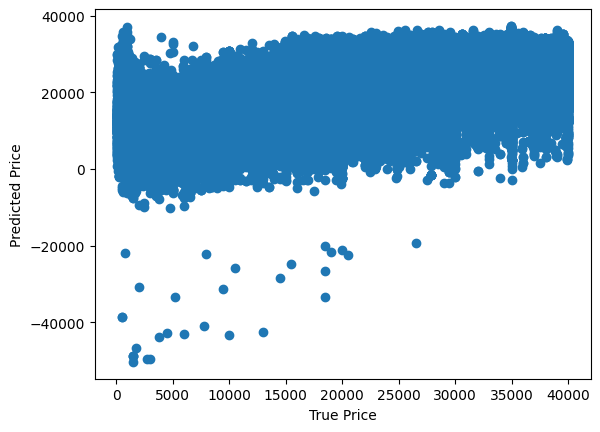

In [26]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

Let's try a different model. We can use a logistic regression model so that none of our prices are negative. We'll first need to encode the price column to be between 0 and 1. 

In [27]:
df['price'] = df['price']/max(df['price'])

In [28]:
# First we choose our variables
X = df.drop(columns=['price'])
y = df['price']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
import statsmodels.api as sm

# Sample data (replace with your actual data)

# Use statsmodels for p-value calculation
Xsm = sm.add_constant(X_train)  # Add constant for intercept term
model2 = sm.Logit(y_train, Xsm)
result = model2.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.542361
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  price   No. Observations:               262886
Model:                          Logit   Df Residuals:                   262867
Method:                           MLE   Df Model:                           18
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                  0.1654
Time:                        23:42:34   Log-Likelihood:            -1.4258e+05
converged:                       True   LL-Null:                   -1.7084e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -243.3400      2.507    -97.072      0.000    -248.253    -238.427
region       -9.362e-05

In [31]:
y_pred = result.predict(sm.add_constant(X_test))

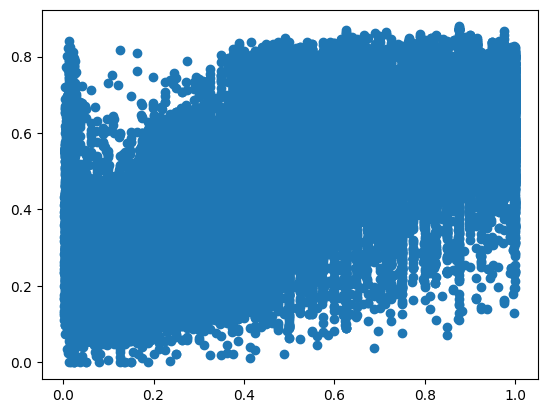

In [32]:
plt.plot(y_test, y_pred, 'o')

In [33]:
MAPE(y_test, y_pred)

185.7862129728562

In [34]:
r2_score(y_test, y_pred)

0.4933698705880425

### Pandas Example with Vehicle Data
Your vehicle monitors many different variables including the revolutions per minute, gas mileage, oxygen sensors, and catalytic converter temperature (unless you have an electric car) to name a few. You have access to that data as there's an OBD II port likely below your steering wheel. I've collected some data from my 2019 Kia Forte that we'll look at.

In [35]:
# read in the data from the csv file about weather in Ogden Utah
data = pd.read_csv('https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/kiadata.csv?raw=True')


In [36]:
# prepare data
data['time'] = pd.to_datetime(data['time']) # set time to datetime to help with plotting
data = data.set_index('time') #set index to time

# fill in NaNs as the data for each variable is collected at different times (and so places NaNs in the other columns)
# fill in NaNs - forward fill - fill in missing values with the previous value
data.fillna(method='ffill',inplace=True)
# fill in NaNs - backward fill
data.fillna(method='bfill',inplace=True)

# remove columns that match keywords
for dc in data.columns:
    if ("Average" in dc) or ("(total)" in dc) \
       or ("$" in dc) or ("(mA)" in dc) or ('Unnamed' in dc):
        del data[dc]

/var/folders/6d/1jr2w1qx1rnd2nkndlq4hc700000gn/T/ipykernel_36377/834267956.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time']) # set time to datetime to help with plotting


In [37]:
# print data columns
for x in data.columns:
    print(x)

# warm-ups since codes cleared ()
Absolute load value (%)
Absolute pedal position D (%)
Absolute pedal position E (%)
Absolute throttle position B (%)
Actual engine - percent torque (%)
Altitude (GPS) (feet)
Ambient air temperature (℉)
Barometric pressure (kPa)
Calculated boost (bar)
Calculated engine load value (%)
Calculated instant fuel consumption (MPG)
Calculated instant fuel rate (gal./h)
Catalyst temperature Bank 1 Sensor 1 (℉)
Catalyst temperature Bank 1 Sensor 2 (℉)
Commanded EGR duty (%)
Commanded evaporative purge (%)
Commanded throttle actuator (%)
Control module voltage (V)
Distance to empty (miles)
Distance traveled since codes cleared (miles)
Distance traveled with MIL on (miles)
Distance travelled (miles)
EGR error (%)
Engine coolant temperature (℉)
Engine Exhaust Flow Rate (g/sec)
Engine Friction - Percent Torque (%)
Engine Fuel Rate (g/sec)
Engine reference torque (N⋅m)
Engine RPM (rpm)
Engine RPM x1000 (rpm)
Evap. system vapor pressure (Pa)
Fuel economizer (based on 

In [38]:
#rename columns
data.rename(columns={'Calculated instant fuel consumption (MPG)':'Calculated MPG'}, inplace=True)

In [39]:
#also reset the data for the calculated MPG to be at most 100 mpg with a lambda function
data['Calculated MPG'] = data['Calculated MPG'].apply(lambda x: 100 if x>100 else x)

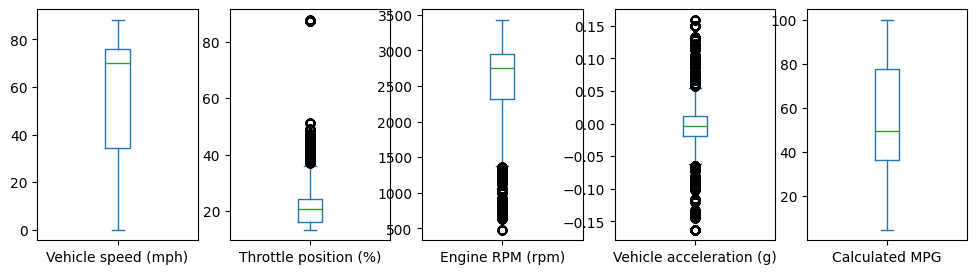

In [40]:
select = ['Vehicle speed (mph)','Throttle position (%)',\
          'Engine RPM (rpm)', 'Vehicle acceleration (g)','Calculated MPG']
data[select].plot(kind='box', subplots=True, figsize=(12,3))
plt.show()

### Pair plot
A pair plot can be helpful to see if any of the variables appear related

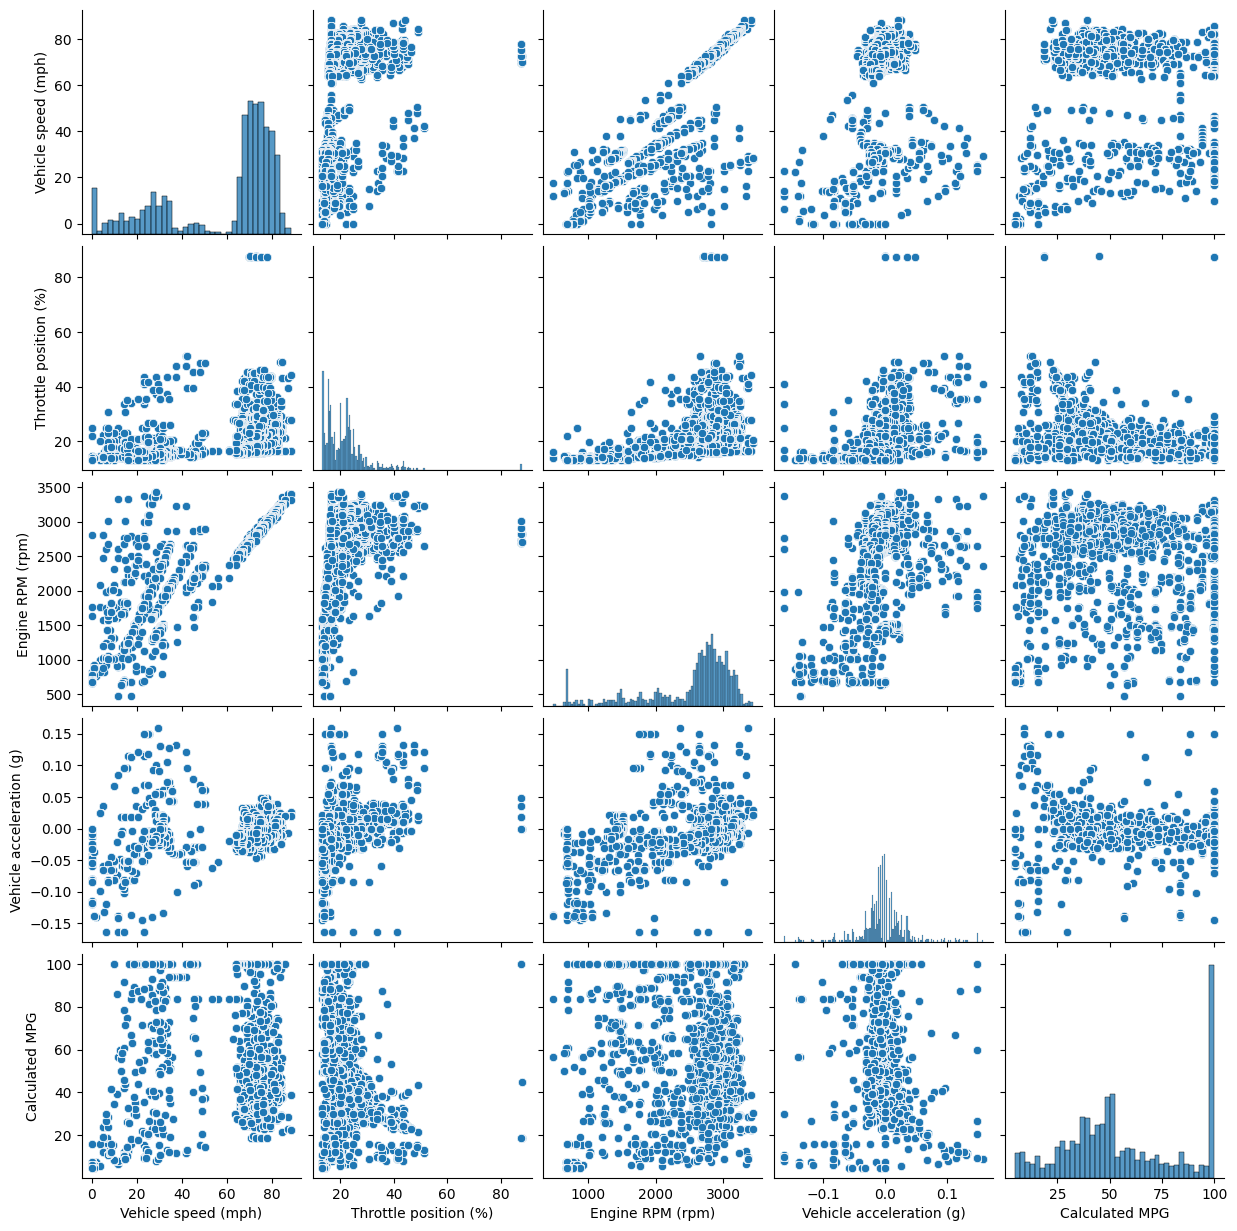

In [41]:
import seaborn as sns
sns.pairplot(data[select])
plt.show()

## Multivairate Regression Example

#### First Generate Data

In [42]:
def tree_height(w,f):
    return 5*w**2 + (8*f) + np.random.rand(50)*0.1+5

In [43]:
#generate data
tree = dict(water=np.linspace(0,1,50),fertilizer=np.linspace(0,0.5,50))
tree['height'] = tree_height(tree['water'], tree['fertilizer'])
tree = pd.DataFrame(tree)
tree.head()

,water,fertilizer,height
0,0.000000,0.000000,5.031673
1,0.020408,0.010204,5.084039
2,0.040816,0.020408,5.238118
3,0.061224,0.030612,5.279382
4,0.081633,0.040816,5.458306


In [44]:
tree.describe()

,water,fertilizer,height
count,50.000000,50.000000,50.000000
mean,0.500000,0.250000,8.742089
std,0.297498,0.148749,2.706231
min,0.000000,0.000000,5.031673
25%,0.250000,0.125000,6.361153
50%,0.500000,0.250000,8.308828
75%,0.750000,0.375000,10.859874
max,1.000000,0.500000,14.072323


In [45]:
#meshplot the dataa
W, F = np.meshgrid(tree['water'],tree['fertilizer'])
H = tree_height(W,F)

nr, nc = H.shape

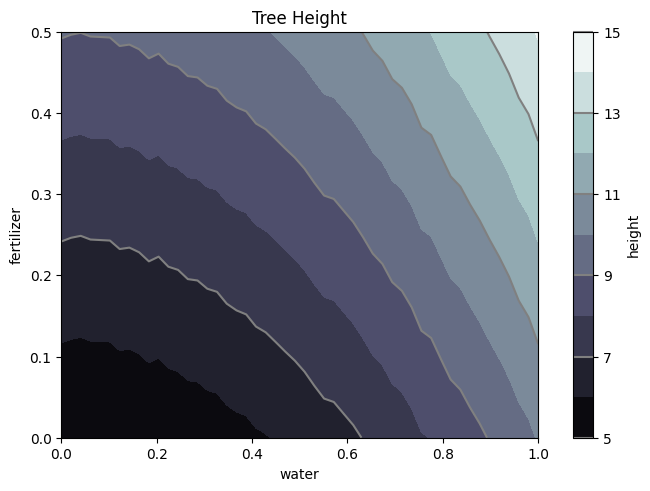

In [46]:
fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(W, F, H, 10, cmap=plt.cm.bone)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='gray')

ax2.set_title('Tree Height')
ax2.set_xlabel('water')
ax2.set_ylabel('fertilizer')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('height')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

#### Now complete the regression, first with one variable: fertilizer

In [47]:
#Complete the same above task with the statsmodels package
import statsmodels.api as sm
X = tree['fertilizer']
X = sm.add_constant(X)
y = tree['height']
#X = sm.add_constant(X) include this if you want to fit a line with an intercept
model1 = sm.OLS(y, X)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2260.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           4.94e-42
Time:                        23:43:43   Log-Likelihood:                -23.392
No. Observations:                  50   AIC:                             50.78
Df Residuals:                      48   BIC:                             54.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2413      0.110     38.603      0.0

In [48]:
Zp = []; Wf = W.flatten(); Ff = F.flatten()
for i,each in enumerate(Wf):
    Zp.append(results1.params[0] + results1.params[1]*Ff[i])
Zp = np.array(Zp).reshape(50,50)

In [49]:
#Calculate the MAPE
np.mean((np.abs(H.flatten() - Zp.flatten()))/H.flatten())*100

19.686102257537865

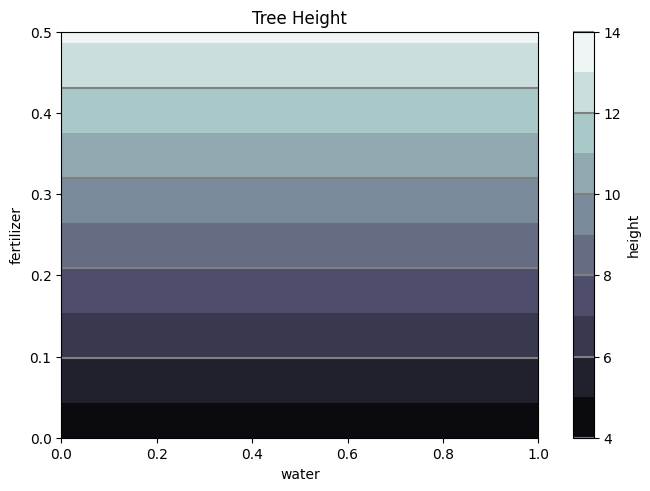

In [50]:
fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(W, F, Zp, 10, cmap=plt.cm.bone)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='gray')

ax2.set_title('Tree Height')
ax2.set_xlabel('water')
ax2.set_ylabel('fertilizer')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('height')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

#### Now complete the regression with two variables: fertilizer and water

In [51]:
#Complete the same above task with the statsmodels package
import statsmodels.api as sm
X = tree[['water','fertilizer']]
X = sm.add_constant(X)
y = tree['height']
model2 = sm.OLS(y, X)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2260.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           4.94e-42
Time:                        23:43:43   Log-Likelihood:                -23.392
No. Observations:                  50   AIC:                             50.78
Df Residuals:                      48   BIC:                             54.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2413      0.110     38.603      0.0

In [52]:
Zp2 = []
for i,each in enumerate(Wf):
    Zp2.append(results2.params[0]+results2.params[1]*Wf[i]+results2.params[2]*Ff[i])
Zp2 = np.array(Zp2).reshape(50,50)

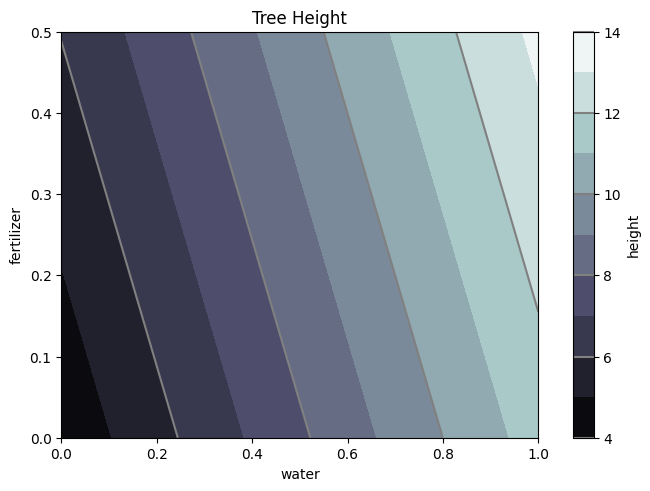

In [53]:
fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(W, F, Zp2, 10, cmap=plt.cm.bone)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='gray')

ax2.set_title('Tree Height')
ax2.set_xlabel('water')
ax2.set_ylabel('fertilizer')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('height')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

In [54]:
#Calculate the MAPE
np.mean((np.abs(H.flatten() - Zp2.flatten()))/H.flatten())*100

9.915201133911209